<a href="https://colab.research.google.com/github/ChaelinL/Deeplearning_for_everyone/blob/main/14%EC%9E%A5_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 레드 와인과 화이트 와인 구분하기

***모델 성능 향상시키기***

**1. 데이터 확인**

In [2]:
import pandas as pd

!git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/wine.csv', header=None)
df

fatal: destination path 'data' already exists and is not an empty directory.


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


**2. 검증셋**
(학습셋은 그 안에서 검증셋과 학습셋으로 나누어짐)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

x = df.iloc[:,0:12]
y = df.iloc[:,12]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)  # 테스트셋 20%, 학습셋 80%

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50, batch_size=500, validation_split=0.25)  # validation_split -> 학습셋 80% 중 검증셋 25%

score = model.evaluate(x_test, y_test)
print('Test accuracy: ', score[1])

Epoch 1/50
8/8 [==============================] - 1s 28ms/step - loss: 1.1362 - accuracy: 0.7685 - val_loss: 0.8660 - val_accuracy: 0.7923
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6962 - accuracy: 0.7852 - val_loss: 0.5153 - val_accuracy: 0.7985
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 0.4377 - accuracy: 0.7963 - val_loss: 0.3687 - val_accuracy: 0.8046
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3710 - accuracy: 0.8096 - val_loss: 0.3769 - val_accuracy: 0.8146
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3619 - accuracy: 0.8270 - val_loss: 0.3440 - val_accuracy: 0.8277
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3294 - accuracy: 0.8360 - val_loss: 0.3196 - val_accuracy: 0.8354
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.3160 - accuracy: 0.8406 - val_loss: 0.3045 - val_accuracy: 0.8508
Epoch 8/50
8/8 [=================

**3. 모델 업데이트하기**

In [4]:
from tensorflow.keras.callbacks import ModelCheckpoint

modelpath = './data/model/{epoch:02d}-{val_accuracy:.4f}.hdf5'  # 모델이 저장되는 조건 설정
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

history = model.fit(x_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])

score = model.evaluate(x_test, y_test)
print('Test Accuracy:', score[1])


Epoch 1: saving model to ./data/model/01-0.9585.hdf5

Epoch 2: saving model to ./data/model/02-0.9585.hdf5

Epoch 3: saving model to ./data/model/03-0.9585.hdf5

Epoch 4: saving model to ./data/model/04-0.9562.hdf5

Epoch 5: saving model to ./data/model/05-0.9585.hdf5

Epoch 6: saving model to ./data/model/06-0.9585.hdf5

Epoch 7: saving model to ./data/model/07-0.9569.hdf5

Epoch 8: saving model to ./data/model/08-0.9600.hdf5

Epoch 9: saving model to ./data/model/09-0.9592.hdf5

Epoch 10: saving model to ./data/model/10-0.9631.hdf5

Epoch 11: saving model to ./data/model/11-0.9592.hdf5

Epoch 12: saving model to ./data/model/12-0.9600.hdf5

Epoch 13: saving model to ./data/model/13-0.9631.hdf5

Epoch 14: saving model to ./data/model/14-0.9662.hdf5

Epoch 15: saving model to ./data/model/15-0.9677.hdf5

Epoch 16: saving model to ./data/model/16-0.9623.hdf5

Epoch 17: saving model to ./data/model/17-0.9646.hdf5

Epoch 18: saving model to ./data/model/18-0.9685.hdf5

Epoch 19: saving m

**4. 그래프로 과적합 확인하기**

In [6]:
history = model.fit(x_train, y_train, epochs=2000, batch_size=500, validation_split=0.25)

hist_df = pd.DataFrame(history.history)  # history에 저장된 학습 결과 확인
hist_df

Epoch 1/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0272 - accuracy: 0.9928 - val_loss: 0.0846 - val_accuracy: 0.9869
Epoch 2/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0252 - accuracy: 0.9920 - val_loss: 0.0805 - val_accuracy: 0.9877
Epoch 3/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0217 - accuracy: 0.9926 - val_loss: 0.0792 - val_accuracy: 0.9885
Epoch 4/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0208 - accuracy: 0.9946 - val_loss: 0.0820 - val_accuracy: 0.9892
Epoch 5/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0204 - accuracy: 0.9938 - val_loss: 0.0850 - val_accuracy: 0.9900
Epoch 6/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0202 - accuracy: 0.9944 - val_loss: 0.0852 - val_accuracy: 0.9892
Epoch 7/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0205 - accuracy: 0.9933 - val_loss: 0.0856 - val_accuracy: 0.9885
Epoch 8/2000
8/8 [=

,loss,accuracy,val_loss,val_accuracy
0,0.027236,0.992815,0.084629,0.986923
1,0.025229,0.992045,0.080532,0.987692
2,0.021672,0.992558,0.079179,0.988462
3,0.020771,0.994611,0.081960,0.989231
4,0.020424,0.993841,0.085011,0.990000
...,...,...,...,...
1995,0.009484,0.996921,0.101362,0.987692
1996,0.011515,0.996408,0.094264,0.989231
1997,0.008024,0.997947,0.110179,0.986154
1998,0.008441,0.997177,0.100390,0.988462


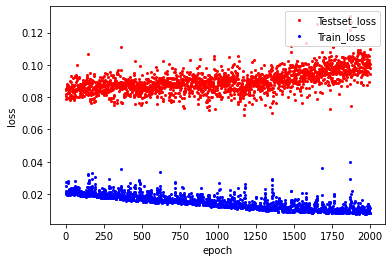

In [10]:
import numpy as np
import matplotlib.pyplot as plt

y_vloss = hist_df['val_loss']  # 검증셋에서 얻은 오차
y_loss = hist_df['loss']  # 학습셋에서 얻은 오차

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=2, label='Testset_loss')  # 검증셋의 오차는 빨간색으로 표시
plt.plot(x_len, y_loss, 'o', c='blue', markersize=2, label='Train_loss')  # 학습셋의 오차는 파란색으로 표시

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()



> ==> 학습이 오래 진행될수록 학습셋(trainset)의 오차는 줄어들지만 검증셋(testset)의 오차는 다시 커짐을 알 수 있다. 따라서 검증셋의 오차가 다시 커지기 전에 학습을 중단시킬 필요가 있다.



**5. 학습의 자동 중단**

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)  # 오차가 20번 이상 낮아지지 않을 경우 학습을 종료하라

modelpath = './data/model/Ch14-4-bestmodel.hdf5'  # 최적화 모델이 저장될 폴더와 모델 이름 설정

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)  # 최적화 모델을 업데이트하고 저장

history = model.fit(x_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.0094 - accuracy: 0.9972 - val_loss: 0.0926 - val_accuracy: 0.9900
Epoch 2/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0087 - accuracy: 0.9982 - val_loss: 0.0935 - val_accuracy: 0.9892
Epoch 3/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0084 - accuracy: 0.9974 - val_loss: 0.1037 - val_accuracy: 0.9885
Epoch 4/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0078 - accuracy: 0.9972 - val_loss: 0.1022 - val_accuracy: 0.9892
Epoch 5/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0084 - accuracy: 0.9974 - val_loss: 0.0999 - val_accuracy: 0.9900
Epoch 6/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0100 - accuracy: 0.9974 - val_loss: 0.0958 - val_accuracy: 0.9885
Epoch 7/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0110 - accuracy: 0.9959 - val_loss: 0.0995 - val_accuracy: 0.9892
Epoch 8/2000
8/8 [=



> ==> epoch 41번에서 멈춘 것을 확인할 수 있음



In [12]:
score = model.evaluate(x_test,y_test)
print('Test Accuracy:', score[1])

41/41 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 0.9877
Test Accuracy: 0.9876922965049744
